In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Importing Dataset GTSRB from Kaggle using API and Unzipping it.


import os
import zipfile

# Install kaggle if not already installed
!pip install kaggle

# Set up the Kaggle API command to download the GTSRB dataset
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

# Unzip the downloaded dataset
dataset_zip = 'gtsrb-german-traffic-sign.zip'

with zipfile.ZipFile(dataset_zip, 'r') as zip_ref:
    zip_ref.extractall('gtsrb_dataset')  # Extract the dataset to 'gtsrb_dataset' folder

# Now the data is in the 'gtsrb_dataset' folder

Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
License(s): CC0-1.0
100% 610M/612M [00:06<00:00, 178MB/s]
100% 612M/612M [00:06<00:00, 92.7MB/s]


In [15]:
# Assuming 'data' and 'labels' are loaded from the 'gtsrb_dataset'
import os

# Load the dataset (replace with your actual loading logic)
data = []
labels = []

# Example using os.walk to iterate through image files and assign labels
for dirpath, dirnames, filenames in os.walk('gtsrb_dataset/Train'): # Only walk through the training data
  for filename in filenames:
    if filename.endswith('.png'): # Assuming images are in PNG format
      # Extract label from directory structure or filename
      label = dirpath.split('/')[-1] # Extract the label from the directory name
      filepath = os.path.join(dirpath, filename)
      # Load image and append to data
      # ...
      data.append(...)
      labels.append(int(label)) # Convert label to integer

print(len(data),len(labels))
print(type(data[0]))
print(labels[0])
print(max(labels),min(labels))

39209 39209
<class 'ellipsis'>
40
42 0


In [16]:
import pickle

# Assuming 'data' and 'labels' are already populated
dict_data = {'data': data, 'labels': labels}  # No need for 'b' prefix in keys

# Specify the output file path
output_file = 'gtsrb_dataset/train_batch'

with open(output_file, 'wb') as f:
    pickle.dump(dict_data, f)

In [17]:
import torch.nn.functional as F
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader, Sampler

class CIFA10(Dataset):
  def __init__(self,filename):
    dict_data = unpickle(filename)
    self.x = dict_data[b'data']
    self.y = dict_data[b'labels']
    self.x = torch.tensor(self.x,dtype=torch.float32)
    self.y = torch.tensor(self.y,dtype=torch.long)
  def __len__(self):
    return len(self.y) # Return the number of data points in the dataset

  def __getitem__(self,idx): # Define the __getitem__ method
    return self.x[idx],self.y[idx]

In [19]:
import torch.nn.functional as F
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader, Sampler
import pickle # Import the pickle module

class CIFA10(Dataset):
  def __init__(self,filename):
    with open(filename, 'rb') as f: # Open the file in binary read mode ('rb')
      dict_data = pickle.load(f) # Use pickle.load() to load the data from the file
    self.x = dict_data['data'] # Access data using string keys
    self.y = dict_data['labels'] # Access labels using string keys
    self.x = torch.tensor(self.x,dtype=torch.float32)
    self.y = torch.tensor(self.y,dtype=torch.long)
  def __len__(self):
    return len(self.y) # Return the number of data points in the dataset

  def __getitem__(self,idx): # Define the __getitem__ method
    return self.x[idx],self.y[idx]

In [21]:
# Assuming 'data' and 'labels' are loaded from the 'gtsrb_dataset'
import os
import cv2 # Import the OpenCV library for image loading

# Load the dataset (replace with your actual loading logic)
data = []
labels = []

# Example using os.walk to iterate through image files and assign labels
for dirpath, dirnames, filenames in os.walk('gtsrb_dataset/Train'): # Only walk through the training data
  for filename in filenames:
    if filename.endswith('.png'): # Assuming images are in PNG format
      # Extract label from directory structure or filename
      label = dirpath.split('/')[-1] # Extract the label from the directory name
      filepath = os.path.join(dirpath, filename)
      # Load image and append to data using OpenCV
      image = cv2.imread(filepath)
      data.append(image)
      labels.append(int(label)) # Convert label to integer

print(len(data),len(labels))
print(type(data[0]))
print(labels[0])
print(max(labels),min(labels))

39209 39209
<class 'numpy.ndarray'>
40
42 0


In [23]:
import torch.nn.functional as F
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader, Sampler
import pickle # Import the pickle module

class CIFA10(Dataset):
  def __init__(self,filename):
    with open(filename, 'rb') as f: # Open the file in binary read mode ('rb')
      dict_data = pickle.load(f) # Use pickle.load() to load the data from the file
    self.x = dict_data['data'] # Access data using string keys
    self.y = dict_data['labels'] # Access labels using string keys

    # Check for ellipsis in the data and handle it
    if ... in self.x:
      print("Warning: Ellipsis found in data. Please investigate and handle appropriately.")
      # Example: Replace ellipsis with a suitable value (e.g., 0)
      self.x = [item if item is not ... else 0 for item in self.x]

    self.x = torch.tensor(self.x,dtype=torch.float32)
    self.y = torch.tensor(self.y,dtype=torch.long)
  def __len__(self):
    return len(self.y) # Return the number of data points in the dataset

  def __getitem__(self,idx): # Define the __getitem__ method
    return self.x[idx],self.y[idx]

In [26]:
import os
import cv2
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms # Import transforms module

class GTSRBDataset(Dataset):
  def __init__(self, root_dir, transform=None):
    self.root_dir = root_dir
    self.transform = transform
    self.data = []
    self.labels = []
    self._load_data()

  def _load_data(self):
    for dirpath, dirnames, filenames in os.walk(self.root_dir):
      for filename in filenames:
        if filename.endswith('.png'):
          try: # Add a try-except block to handle the 'Test' directory
            label = int(dirpath.split('/')[-1])
          except ValueError: # Catch the ValueError
            label = -1 # Assign a default label (e.g., -1) for 'Test' directory
          filepath = os.path.join(dirpath, filename)
          image = cv2.imread(filepath)
          if image is not None:  # Check if image loading was successful
            self.data.append(image)
            self.labels.append(label)

  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx):
    image = self.data[idx]
    label = self.labels[idx]
    if self.transform:
      image = self.transform(image)
    return image, label

# Example usage
# Define a transform to resize the images to a consistent size
transform = transforms.Compose([
    transforms.ToTensor(), # Convert the image to a PyTorch tensor
    transforms.Resize((32, 32)) # Resize the image to 32x32 pixels
])

train_data = GTSRBDataset('gtsrb_dataset/Train', transform=transform) # Apply the transform to the training data
test_data = GTSRBDataset('gtsrb_dataset/Test', transform=transform) # Apply the transform to the test data


train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=10, shuffle=True)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([10, 3, 32, 32])
Shape of y: torch.Size([10]) torch.int64


In [27]:
import torch
import torch.nn as nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')

class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(32*32*3, 1024), # Fully connected layer from input (32*32*3) to 1024 neurons
            nn.ReLU(), # ReLU activation function
            nn.Linear(1024, 512), # Fully connected layer from 1024 to 512 neurons
            nn.ReLU(), # ReLU activation function
            nn.Linear(512, 43) # Fully connected layer from 512 neurons to 43 output classes
        )

    def forward(self, x):
        # Flatten the input image
        x = x.view(x.size(0), -1)
        x = self.layers(x) # Pass data through the layers
        return x # Return the output

model = MLP().to(device) # Create an instance of the model and move it to the device
print(model) # Print the model architecture

Using cpu device
MLP(
  (layers): Sequential(
    (0): Linear(in_features=3072, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=43, bias=True)
  )
)


In [28]:
criterion = nn.CrossEntropyLoss() # Define the loss function as CrossEntropyLoss (suitable for multi-class classification)
optimizer = torch.optim.Adam(model.parameters()) # Define the optimizer as Adam (a popular optimization algorithm)

In [29]:
def train(data_loader, model, criterion, optimizer):
    model.train() # Set the model to training mode
    num_batches = len(data_loader) # Calculate the number of batches
    num_items = len(data_loader.dataset) # Calculate the total number of data items
    total_loss = 0
    total_correct = 0
    for X, y in data_loader: # Use X and y for data and target
        X = X.to(device)
        y = y.to(device)
        # Do a forward pass
        output = model(X)
        loss = criterion(output, y) # Calculate the loss

        optimizer.zero_grad() # Reset gradients before backward pass
        loss.backward() # Perform backpropagation
        optimizer.step() # Update model parameters

        total_loss += loss.item() * X.size(0) # Accumulate the loss
        _, predicted = torch.max(output.data, 1) # Get predicted classes
        total_correct += (predicted == y).sum().item() # Calculate correct predictions

    # Calculate average loss and accuracy for the epoch
    avg_loss = total_loss / num_items
    accuracy = total_correct / num_items

    return avg_loss, accuracy

In [30]:
%%time
epochs = 25
for epoch in range(epochs):
    print(f"Training epoch: {epoch+1}")
    avg_loss, accuracy = train(train_dataloader, model, criterion, optimizer) # Get average loss and accuracy from train function
    print(f"Average loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}") # Print the results

Training epoch: 1
Average loss: 1.6912, Accuracy: 0.5256
Training epoch: 2
Average loss: 0.6602, Accuracy: 0.8110
Training epoch: 3
Average loss: 0.4591, Accuracy: 0.8683
Training epoch: 4
Average loss: 0.3584, Accuracy: 0.8979
Training epoch: 5
Average loss: 0.3111, Accuracy: 0.9108
Training epoch: 6
Average loss: 0.2604, Accuracy: 0.9262
Training epoch: 7
Average loss: 0.2370, Accuracy: 0.9315
Training epoch: 8
Average loss: 0.1967, Accuracy: 0.9436
Training epoch: 9
Average loss: 0.1831, Accuracy: 0.9448
Training epoch: 10
Average loss: 0.1753, Accuracy: 0.9478
Training epoch: 11
Average loss: 0.1500, Accuracy: 0.9556
Training epoch: 12
Average loss: 0.1402, Accuracy: 0.9567
Training epoch: 13
Average loss: 0.1335, Accuracy: 0.9591
Training epoch: 14
Average loss: 0.1424, Accuracy: 0.9561
Training epoch: 15
Average loss: 0.1281, Accuracy: 0.9608
Training epoch: 16
Average loss: 0.1213, Accuracy: 0.9620
Training epoch: 17
Average loss: 0.1149, Accuracy: 0.9649
Training epoch: 18
Aver

In [35]:
#Finding Final Test Loss and Accuracy.


def evaluate(model, data_loader, criterion):
    model.eval()  # Set the model to evaluation mode
    total_loss = 0
    total_correct = 0
    num_batches = len(data_loader)
    num_items = len(data_loader.dataset)

    with torch.no_grad():  # Disable gradient computation
        for data, target in data_loader:
            data = data.to(device)
            target = target.to(device)

            # Print data and target shapes
            print(f"Data shape: {data.shape}, Target shape: {target.shape}")

            # Check for and handle invalid target values
            valid_targets = (target >= 0)
            data = data[valid_targets]
            target = target[valid_targets]

            if len(target) == 0:
                continue

            # Forward pass
            output = model(data)

            # Print the output shape and target for debugging
            print(f"Output shape: {output.shape}, Target: {target}")

            # Calculate the loss
            loss = criterion(output, target)
            total_loss += loss.item()

            # Count correct predictions
            total_correct += (torch.argmax(output, dim=1) == target).sum().item()

    # Calculate average loss and accuracy
    average_loss = total_loss / num_batches
    accuracy = total_correct / num_items

    return average_loss, accuracy

# Evaluate the model on test data
test_loss, test_accuracy = evaluate(model, test_dataloader, criterion)

print(f"Final Test Loss: {test_loss}")
print(f"Final Test Accuracy: {test_accuracy * 100:.2f}%")

Data shape: torch.Size([10, 3, 32, 32]), Target shape: torch.Size([10])
Data shape: torch.Size([10, 3, 32, 32]), Target shape: torch.Size([10])
Data shape: torch.Size([10, 3, 32, 32]), Target shape: torch.Size([10])
Data shape: torch.Size([10, 3, 32, 32]), Target shape: torch.Size([10])
Data shape: torch.Size([10, 3, 32, 32]), Target shape: torch.Size([10])
Data shape: torch.Size([10, 3, 32, 32]), Target shape: torch.Size([10])
Data shape: torch.Size([10, 3, 32, 32]), Target shape: torch.Size([10])
Data shape: torch.Size([10, 3, 32, 32]), Target shape: torch.Size([10])
Data shape: torch.Size([10, 3, 32, 32]), Target shape: torch.Size([10])
Data shape: torch.Size([10, 3, 32, 32]), Target shape: torch.Size([10])
Data shape: torch.Size([10, 3, 32, 32]), Target shape: torch.Size([10])
Data shape: torch.Size([10, 3, 32, 32]), Target shape: torch.Size([10])
Data shape: torch.Size([10, 3, 32, 32]), Target shape: torch.Size([10])
Data shape: torch.Size([10, 3, 32, 32]), Target shape: torch.Siz

Training epoch: 1
Average loss: 0.0637, Accuracy: 0.9793
Training epoch: 2
Average loss: 0.0651, Accuracy: 0.9811
Training epoch: 3
Average loss: 0.0652, Accuracy: 0.9802
Training epoch: 4
Average loss: 0.0557, Accuracy: 0.9835
Training epoch: 5
Average loss: 0.0519, Accuracy: 0.9841


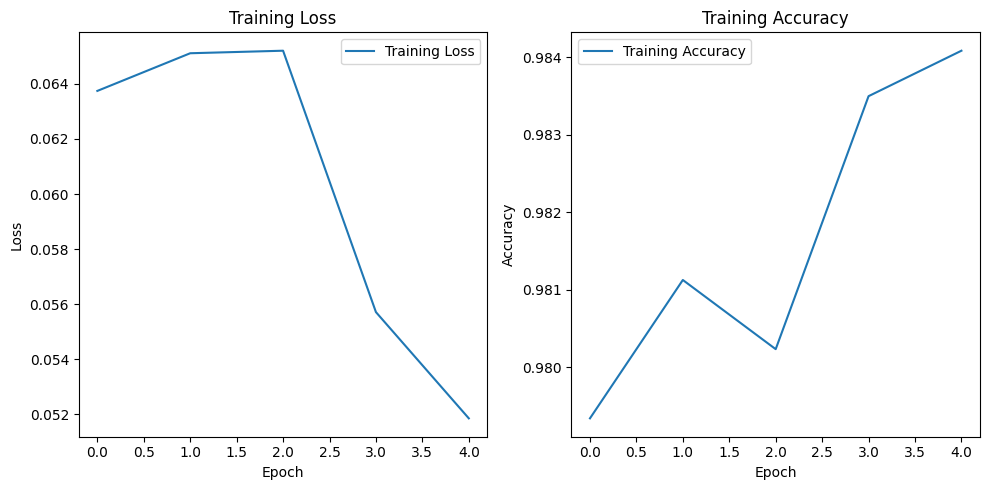

In [40]:
!pip install matplotlib

import matplotlib.pyplot as plt

# Lists to store metrics for plotting
train_losses = []
train_accuracies = []

epochs = 5
for epoch in range(epochs):
    print(f"Training epoch: {epoch+1}")
    avg_loss, accuracy = train(train_dataloader, model, criterion, optimizer)
    print(f"Average loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}")

    # Append metrics for plotting
    train_losses.append(avg_loss)
    train_accuracies.append(accuracy)

# Plotting
plt.figure(figsize=(10, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()